In [7]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import statsmodels.graphics.tsaplots as sgt
 from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats.distributions import chi2
from scipy.stats import chi2
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
sns.set()

In [8]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b') 
df_comp = df_comp.ffill()  


In [9]:
 df_comp['market_value']=df_comp.ftse

In [10]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]


In [5]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = 2 * (L2 - L1)
    p = chi2.sf(LR, DF).round(3)
    return p 

In [14]:
result = adfuller(df['market_value'])
result

(-1.90415514188369,
 0.3301089327702815,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

In [16]:
df['returns'] = df['market_value'].pct_change(1).mul(100)
df = df.iloc[1:]


In [18]:
result = adfuller(df['returns'].dropna())
result

(-12.79033260391001,
 7.099523586679464e-24,
 32,
 4986,
 {'1%': -3.43166220814716,
  '5%': -2.862119853748156,
  '10%': -2.567078656914853},
 15690.778602127364)

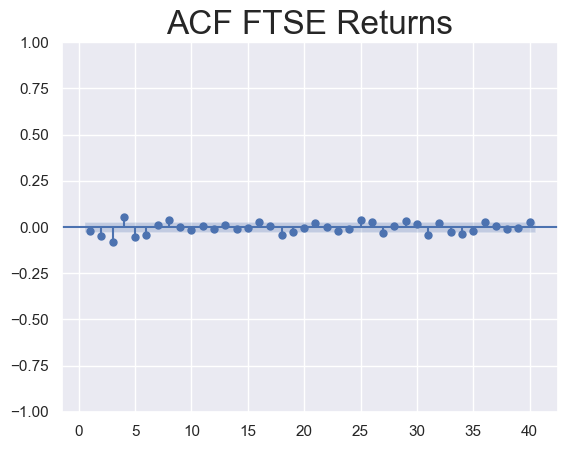

In [19]:
sgt.plot_acf(df.returns, lags=40, zero=False)
plt.title("ACF FTSE Returns", size=24)
plt.show()

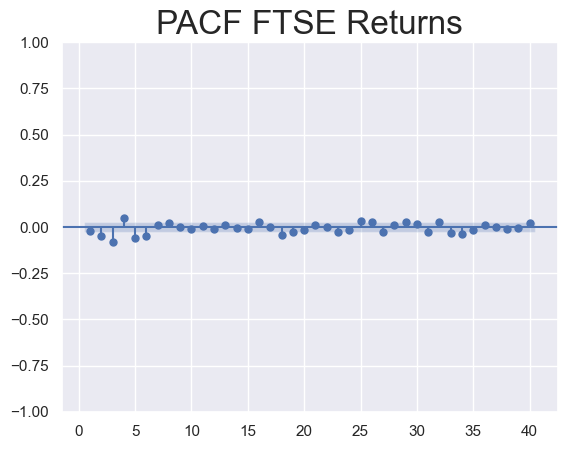

In [20]:
sgt.plot_pacf(df.returns, lags=40, zero=False, method='ols')
plt.title("PACF FTSE Returns", size=24)
plt.show()

In [22]:
model_ret_ar_1 = ARIMA(df['returns'].dropna(), order=(1, 0, 0))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7928.655
Date:                Mon, 09 Dec 2024   AIC                          15863.311
Time:                        19:29:00   BIC                          15882.874
Sample:                    01-11-1994   HQIC                         15870.166
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.145      0.252      -0.013       0.051
ar.L1         -0.0230      0.009     -2.699      0.007      -0.040      -0.006
sigma2         1.3793      0.014    100.071      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7866.61
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
model_ret_ar_2 = ARIMA(df['returns'].dropna(), order=(2, 0, 0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7922.353
Date:                Mon, 09 Dec 2024   AIC                          15852.707
Time:                        19:30:46   BIC                          15878.790
Sample:                    01-11-1994   HQIC                         15861.847
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.197      0.231      -0.012       0.050
ar.L1         -0.0242      0.009     -2.802      0.005      -0.041      -0.007
ar.L2         -0.0501      0.008     -6.375      0.000      -0.065      -0.035
sigma2         1.3758      0.014     99.572      0.000       1.349       1.403
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7724.32
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [25]:
model_ret_ar_3 = ARIMA(df['returns'].dropna(), order=(3, 0, 0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7905.632
Date:                Mon, 09 Dec 2024   AIC                          15821.264
Time:                        19:32:11   BIC                          15853.869
Sample:                    01-11-1994   HQIC                         15832.689
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.275      0.202      -0.010       0.048
ar.L1         -0.0283      0.009     -3.203      0.001      -0.046      -0.011
ar.L2         -0.0521      0.008     -6.689      0.000      -0.067      -0.037
ar.L3         -0.0815      0.008    -10.192      0.000      -0.097      -0.066
sigma2         1.3667      0.014     94.499      0.000       1.338       1.395
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6853.73
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

In [28]:
model_ret_ar_4 = ARIMA(df['returns'].dropna(), order=(4, 0, 0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print(LLR_test(model_ret_ar_3, model_ret_ar_4))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -7900.213
Date:                Mon, 09 Dec 2024   AIC                          15812.427
Time:                        19:35:05   BIC                          15851.553
Sample:                    01-11-1994   HQIC                         15826.137
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.016      1.212      0.226      -0.012       0.049
ar.L1         -0.0246      0.009     -2.773      0.006      -0.042      -0.007
ar.L2         -0.0497      0.008     -6.335      0.0

In [29]:
model_ret_ar_5 = ARIMA(df['returns'].dropna(), order=(5, 0, 0))
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print(LLR_test(model_ret_ar_4, model_ret_ar_5))


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -7891.277
Date:                Mon, 09 Dec 2024   AIC                          15796.553
Time:                        19:35:43   BIC                          15842.200
Sample:                    01-11-1994   HQIC                         15812.549
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.277      0.202      -0.010       0.048
ar.L1         -0.0218      0.009     -2.400      0.016      -0.040      -0.004
ar.L2         -0.0545      0.008     -6.832      0.0

In [30]:
model_ret_ar_6 = ARIMA(df['returns'].dropna(), order=(6, 0, 0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print(LLR_test(model_ret_ar_5, model_ret_ar_6))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7885.842
Date:                Mon, 09 Dec 2024   AIC                          15787.684
Time:                        19:36:08   BIC                          15839.852
Sample:                    01-11-1994   HQIC                         15805.965
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.327      0.185      -0.009       0.047
ar.L1         -0.0246      0.009     -2.643      0.008      -0.043      -0.006
ar.L2         -0.0524      0.008     -6.511      0.0

In [31]:
model_ret_ar_7 = ARIMA(df['returns'].dropna(), order=(7, 0, 0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -7885.542
Date:                Mon, 09 Dec 2024   AIC                          15789.083
Time:                        19:36:29   BIC                          15847.772
Sample:                    01-11-1994   HQIC                         15809.649
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.307      0.191      -0.009       0.047
ar.L1         -0.0240      0.009     -2.582      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.380      0.000      -0.068      -0.036
ar.L3         -0.0874      0.008    -10.725      0.000      -0.103      -0.071
ar.L4          0.0434      0.008      5.188      0.000       0.027       0.060
ar.L5         -0.0601      0.008     -7.460      0.000      -0.076      -0.044
ar.L6         -0.0462      0.009     -5.168      0.000      -0.064      -0.029
ar.L7          0.0109      0.009      1.211      0.226      -0.007       0.029
sigma2         1.3558      0.015     91.760      0.000       1.327       1.385
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6442.56
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
LLR_test(model_ret_ar_6, model_ret_ar_7)

0.438

In [34]:
benchmark = df.market_value.iloc[0]

In [35]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [37]:
result = adfuller(df['norm'].dropna())
result

(-1.8779457772515635,
 0.34250616684813634,
 6,
 5012,
 {'1%': -3.431655397510801,
  '5%': -2.862116844845668,
  '10%': -2.567077055158601},
 19627.21698752037)

In [38]:
bench_ret = df.returns.iloc[0]


In [39]:
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

In [41]:
result = adfuller(df['norm_ret'].dropna())
result

(-12.790332603910132,
 7.099523586675285e-24,
 32,
 4986,
 {'1%': -3.43166220814716,
  '5%': -2.862119853748156,
  '10%': -2.567078656914853},
 64101.053116833515)

In [43]:
model_norm_ret_ar_1 = ARIMA(df['norm_ret'].dropna(), order=(1, 0, 0))  # AR(1)
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -32293.995
Date:                Mon, 09 Dec 2024   AIC                          64593.990
Time:                        19:44:26   BIC                          64613.553
Sample:                    01-11-1994   HQIC                         64600.846
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4123      2.107     -1.145      0.252      -6.542       1.717
ar.L1         -0.0230      0.009     -2.699      0.007      -0.040      -0.006
sigma2      2.272e+04    227.050    100.059      0.000    2.23e+04    2.32e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7866.57
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
model_norm_ret_ar_2 = ARIMA(df['norm_ret'].dropna(), order=(2, 0, 0))  # AR(2)
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -32287.693
Date:                Mon, 09 Dec 2024   AIC                          64583.386
Time:                        19:47:21   BIC                          64609.470
Sample:                    01-11-1994   HQIC                         64592.526
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4123      2.021     -1.194      0.233      -6.373       1.549
ar.L1         -0.0242      0.009     -2.802      0.005      -0.041      -0.007
ar.L2         -0.0501      0.008     -6.375      0.000      -0.065      -0.035
sigma2      2.266e+04    227.599     99.564      0.000    2.22e+04    2.31e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7724.32
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
model_norm_ret_ar_7 = ARIMA(df['norm_ret'].dropna(), order=(7, 0, 0)) 
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -32250.882
Date:                Mon, 09 Dec 2024   AIC                          64519.764
Time:                        19:48:01   BIC                          64578.453
Sample:                    01-11-1994   HQIC                         64540.329
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4123      1.863     -1.295      0.195      -6.063       1.238
ar.L1         -0.0241      0.009     -2.581      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.376      0.000      -0.068      -0.036
ar.L3         -0.0874      0.008    -10.718      0.000      -0.103      -0.071
ar.L4          0.0434      0.008      5.185      0.000       0.027       0.060
ar.L5         -0.0601      0.008     -7.456      0.000      -0.076      -0.044
ar.L6         -0.0462      0.009     -5.165      0.000      -0.064      -0.029
ar.L7          0.0109      0.009      1.210      0.226      -0.007       0.029
sigma2      2.234e+04    243.624     91.705      0.000    2.19e+04    2.28e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6442.56
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
df['res_price'] = results_norm_ret_ar_7.resid


In [50]:
print(df.res_price.mean())

-0.017240299589928707


In [51]:
print(df.res_price.var())

22333.287007611587


In [52]:
result = adfuller(df['res_price'].dropna())
result

(-70.83057380451528,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 64096.323507147375)

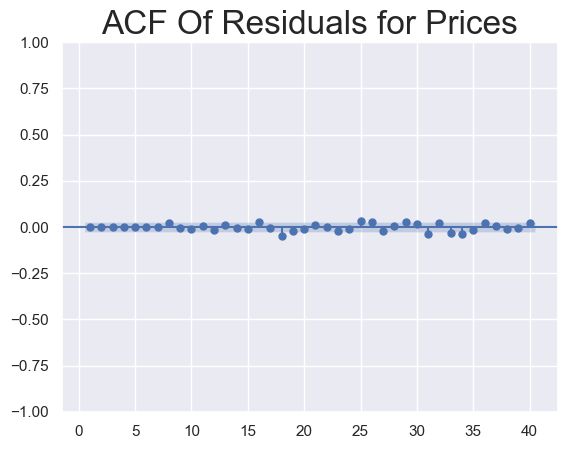

In [53]:
sgt.plot_acf(df.res_price, zero=False, lags=40)
plt.title("ACF Of Residuals for Prices", size=24)
plt.show()

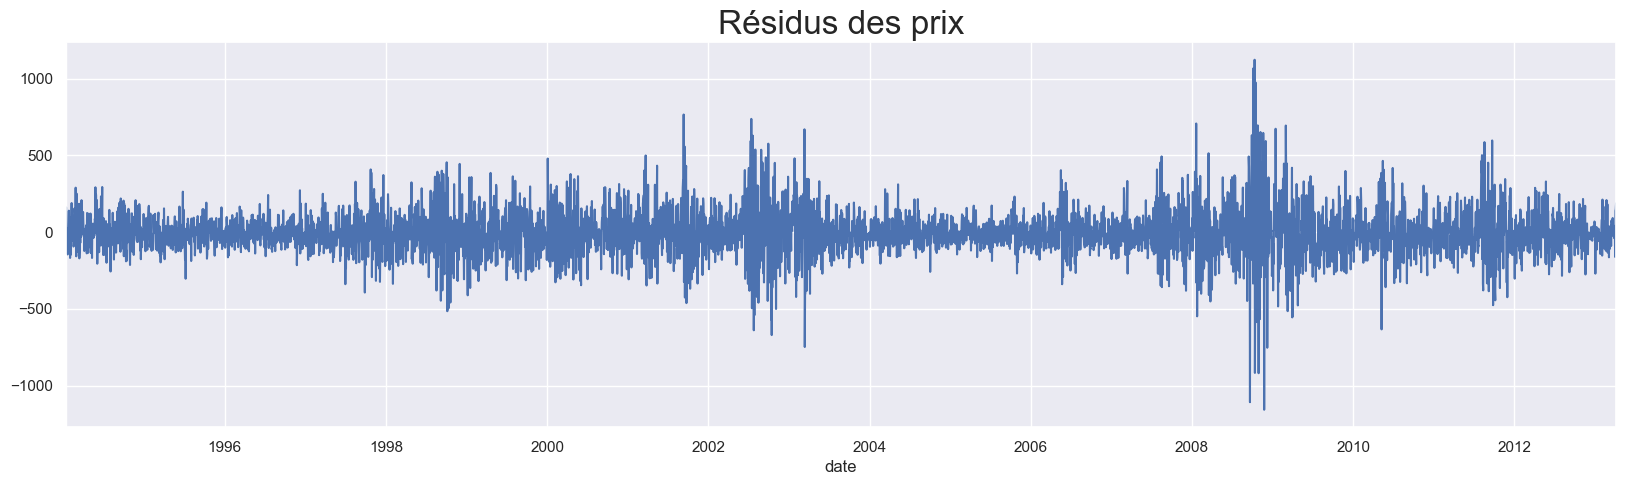

In [54]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Résidus des prix", size=24)
plt.show()

In [56]:
model_norm_ret_ar_3 = ARIMA(df['norm_ret'].dropna(), order=(3, 0, 0))  # AR(2)
results_norm_ret_ar_3 = model_norm_ret_ar_3.fit()
results_norm_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -32270.972
Date:                Mon, 09 Dec 2024   AIC                          64551.943
Time:                        20:01:20   BIC                          64584.548
Sample:                    01-11-1994   HQIC                         64563.369
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4123      1.905     -1.266      0.205      -6.147       1.322
ar.L1         -0.0283      0.009     -3.202      0.001      -0.046      -0.011
ar.L2         -0.0521      0.008     -6.688      0.000      -0.067      -0.037
ar.L3         -0.0815      0.008    -10.189      0.000      -0.097      -0.066
sigma2      2.251e+04    238.307     94.474      0.000     2.2e+04     2.3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6853.72
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
model_norm_ret_ar_4 = ARIMA(df['norm_ret'].dropna(), order=(4, 0, 0))  # AR(2)
results_norm_ret_ar_4 = model_norm_ret_ar_4.fit()
results_norm_ret_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -32265.553
Date:                Mon, 09 Dec 2024   AIC                          64543.107
Time:                        20:01:37   BIC                          64582.232
Sample:                    01-11-1994   HQIC                         64556.817
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4123      2.002     -1.205      0.228      -6.337       1.512
ar.L1         -0.0246      0.009     -2.773      0.006      -0.042      -0.007
ar.L2         -0.0497      0.008     -6.333      0.000      -0.065      -0.034
ar.L3         -0.0802      0.008     -9.992      0.000      -0.096      -0.064
ar.L4          0.0465      0.008      5.653      0.000       0.030       0.063
sigma2      2.247e+04    242.274     92.730      0.000     2.2e+04    2.29e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6575.49
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
model_norm_ret_ar_5 = ARIMA(df['norm_ret'].dropna(), order=(5, 0, 0))  # AR(2)
results_norm_ret_ar_5 = model_norm_ret_ar_5.fit()
results_norm_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -32256.617
Date:                Mon, 09 Dec 2024   AIC                          64527.233
Time:                        20:02:02   BIC                          64572.880
Sample:                    01-11-1994   HQIC                         64543.229
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4123      1.904     -1.267      0.205      -6.145       1.320
ar.L1         -0.0218      0.009     -2.399      0.016      -0.040      -0.004
ar.L2         -0.0545      0.008     -6.829      0.000      -0.070      -0.039
ar.L3         -0.0831      0.008    -10.402      0.000      -0.099      -0.067
ar.L4          0.0450      0.008      5.434      0.000       0.029       0.061
ar.L5         -0.0596      0.008     -7.462      0.000      -0.075      -0.044
sigma2      2.239e+04    242.158     92.463      0.000    2.19e+04    2.29e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6393.46
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
model_norm_ret_ar_6 = ARIMA(df['norm_ret'].dropna(), order=(6, 0, 0))  # AR(2)
results_norm_ret_ar_6 = model_norm_ret_ar_6.fit()
results_norm_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -32251.182
Date:                Mon, 09 Dec 2024   AIC                          64518.365
Time:                        20:02:23   BIC                          64570.533
Sample:                    01-11-1994   HQIC                         64536.645
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4123      1.835     -1.315      0.189      -6.009       1.184
ar.L1         -0.0246      0.009     -2.642      0.008      -0.043      -0.006
ar.L2         -0.0524      0.008     -6.507      0.000      -0.068      -0.037
ar.L3         -0.0870      0.008    -10.846      0.000      -0.103      -0.071
ar.L4          0.0424      0.008      5.135      0.000       0.026       0.059
ar.L5         -0.0607      0.008     -7.561      0.000      -0.076      -0.045
ar.L6         -0.0465      0.009     -5.208      0.000      -0.064      -0.029
sigma2      2.234e+04    241.709     92.442      0.000    2.19e+04    2.28e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6481.87
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
model_norm_ret_ar_7= ARIMA(df['norm_ret'].dropna(), order=(7, 0, 0))  # AR(2)
results_norm_ret_ar_6 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -32250.882
Date:                Mon, 09 Dec 2024   AIC                          64519.764
Time:                        20:02:43   BIC                          64578.453
Sample:                    01-11-1994   HQIC                         64540.329
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4123      1.863     -1.295      0.195      -6.063       1.238
ar.L1         -0.0241      0.009     -2.581      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.376      0.000      -0.068      -0.036
ar.L3         -0.0874      0.008    -10.718      0.000      -0.103      -0.071
ar.L4          0.0434      0.008      5.185      0.000       0.027       0.060
ar.L5         -0.0601      0.008     -7.456      0.000      -0.076      -0.044
ar.L6         -0.0462      0.009     -5.165      0.000      -0.064      -0.029
ar.L7          0.0109      0.009      1.210      0.226      -0.007       0.029
sigma2      2.234e+04    243.624     91.705      0.000    2.19e+04    2.28e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6442.56
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
df['res_price'] = results_norm_ret_ar_6.resid

In [62]:
print(df.res_price.mean())

-0.017240299589928707


In [63]:
print(df.res_price.var())

22333.287007611587


In [64]:
result = adfuller(df['res_price'].dropna())
result

(-70.83057380451528,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 64096.323507147375)

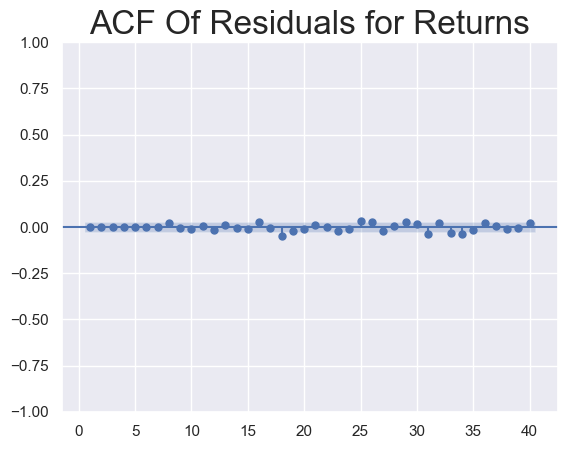

In [65]:
sgt.plot_acf(df.res_price, zero=False, lags=40)
plt.title("ACF Of Residuals for Returns", size=24)
plt.show()

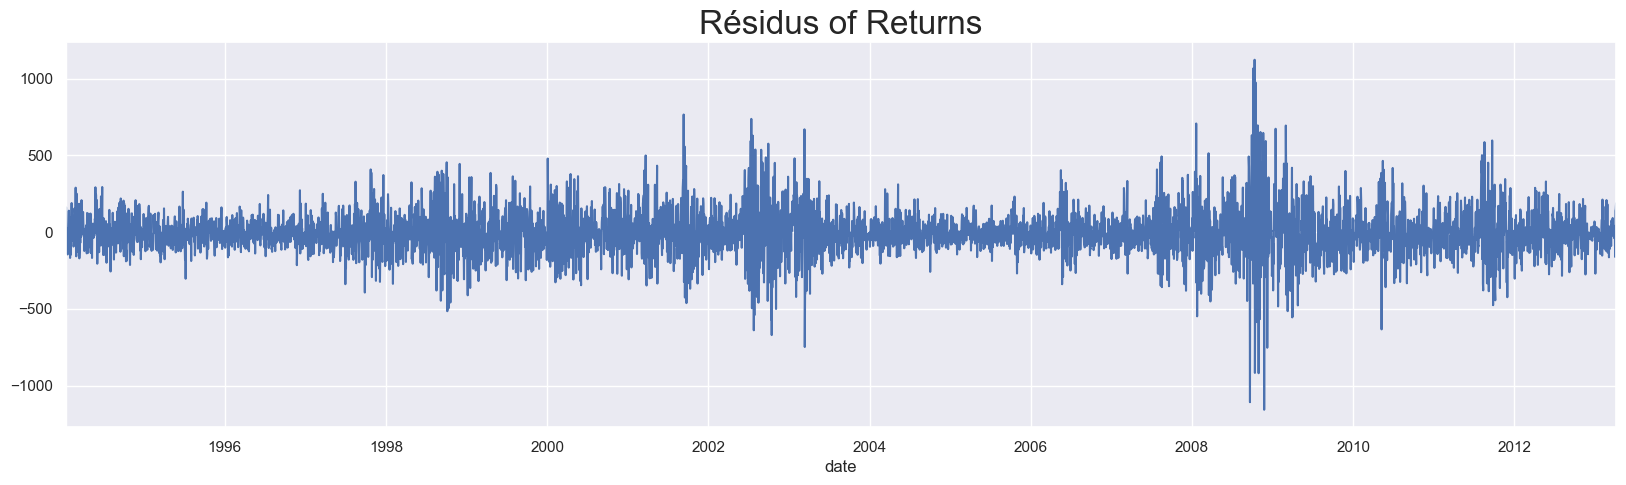

In [66]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Résidus of Returns", size=24)
plt.show()